In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from value import Value
from nn import Layer, Neuron, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

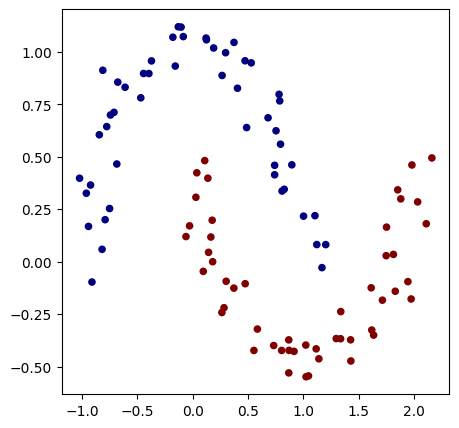

In [4]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')


In [5]:
model = MLP(2,[8,16,8,1])

In [6]:
all_loss = []
for k in range(100):
    #forwardpass 
    inputs = [list(map(Value, xrow)) for xrow in X]
    ypreds = list(map(model, inputs))
    #loss compute 
    loss = sum((ypred-yi)**2 for ypred,yi in zip(ypreds,y))
    
    #backward 
    for p in model.parameters():
        p.grad = 0
    
    loss.backward()
    all_loss.append(loss.data)
    
    for p in model.parameters():
        p.data += -0.001 * p.grad


    print(k,loss.data)

0 479.36927861785375
1 2119.658973228873
2 225.40861970446645
3 99.68757078602691
4 93.74279624770091
5 88.48132903084927
6 83.48593635638026
7 78.58261053221085
8 73.61751311852663
9 69.05073989603486
10 64.61784100233051
11 60.93800202584927
12 57.69808886722421
13 54.82282342212964
14 52.454117293569034
15 50.44639029492884
16 48.74790619447857
17 47.307591746183846
18 46.07853065240562
19 45.066063720320464
20 44.22162736868473
21 43.366651868394065
22 42.65769376301509
23 42.029741427070356
24 41.4799590758948
25 40.99155656822886
26 40.55124462731884
27 40.17416220903241
28 39.87631860714908
29 39.5311039496163
30 39.234296875432925
31 38.965195631623004
32 38.71566211792862
33 38.49363043315453
34 38.31198638447747
35 38.0976232588903
36 37.90432044516184
37 37.72418814668692
38 37.56035755720138
39 37.41791293099798
40 37.25544945651823
41 37.111307722278916
42 36.99320569695192
43 36.88367472595147
44 36.79350618533672
45 36.707100874991156
46 36.63071284328123
47 36.570637029

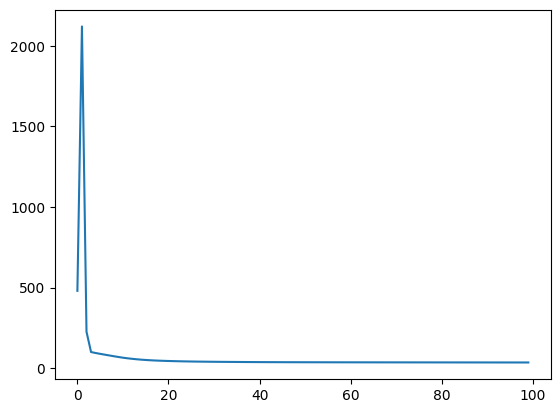

In [7]:
plt.plot(all_loss)
plt.show()

(-1.548639298268643, 1.951360701731357)

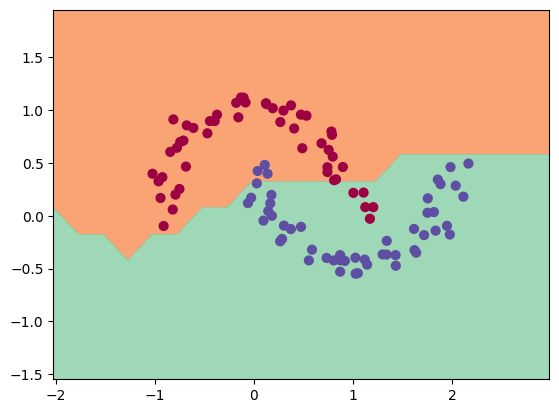

In [8]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())